## COMSOL
## Field Cage

In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy as scp
#data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/fullperfectfieldcagev6_norm_space.csv")
data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/fullperfectfieldcagev7_norm_space.csv",skiprows=8)

In [16]:
import pandas as pd

data["Er"] = np.sqrt(data["es.Ex (V/m)"]** 2 + data["es.Ey (V/m)"]** 2)
print(data.head)

<bound method NDFrame.head of               x       y          z   es.Ex (V/m)   es.Ey (V/m)  es.Ez (V/m)  \
0       -22.728 -19.581   0.000000  44716.000000  38484.000000   8508.00000   
1       -22.881 -19.403   0.000000  44773.000000  38262.000000   7646.90000   
2       -22.729 -19.446  -0.256770  18862.000000  16442.000000  22024.00000   
3       -22.963 -19.708  -0.010647  25336.000000  22111.000000 -15405.00000   
4       -22.761 -19.743  -0.126550  26465.000000  22923.000000    266.84000   
...         ...     ...        ...           ...           ...          ...   
3234537  17.367  24.981  49.777000      0.135120     -0.276700     -0.76905   
3234538  17.156  25.157  50.110000     -0.529510      0.352240     -1.49970   
3234539  18.836  23.925  49.429000     -0.262270     -0.562530      0.69153   
3234540  18.041  24.513  49.744000     -1.518600     -0.088356      0.00005   
3234541  18.875  23.894  50.108000      0.026589      1.526000     -0.33790   

          es.CPx (mm)

<bound method NDFrame.head of               x        y         z   es.Ex (V/m)    es.Ey (V/m)   es.Ez (V/m)  \
219708   27.330   1.3861  -0.12043 -6.204400e+05  -88798.000000  637740.00000   
219709   27.266   1.2812   0.00000  4.257500e+05  -15915.000000  931450.00000   
219710   27.475   1.1735   0.00000 -3.351800e+06 -122430.000000 -549460.00000   
219711   27.464   1.4080   0.00000 -3.600900e+06  -27345.000000 -952320.00000   
219712   27.508   1.5276  -0.12043 -1.278300e+06  -62953.000000 -805490.00000   
...         ...      ...       ...           ...            ...           ...   
3234537  17.367  24.9810  49.77700  1.351200e-01      -0.276700      -0.76905   
3234538  17.156  25.1570  50.11000 -5.295100e-01       0.352240      -1.49970   
3234539  18.836  23.9250  49.42900 -2.622700e-01      -0.562530       0.69153   
3234540  18.041  24.5130  49.74400 -1.518600e+00      -0.088356       0.00005   
3234541  18.875  23.8940  50.10800  2.658900e-02       1.526000      -0.33790  

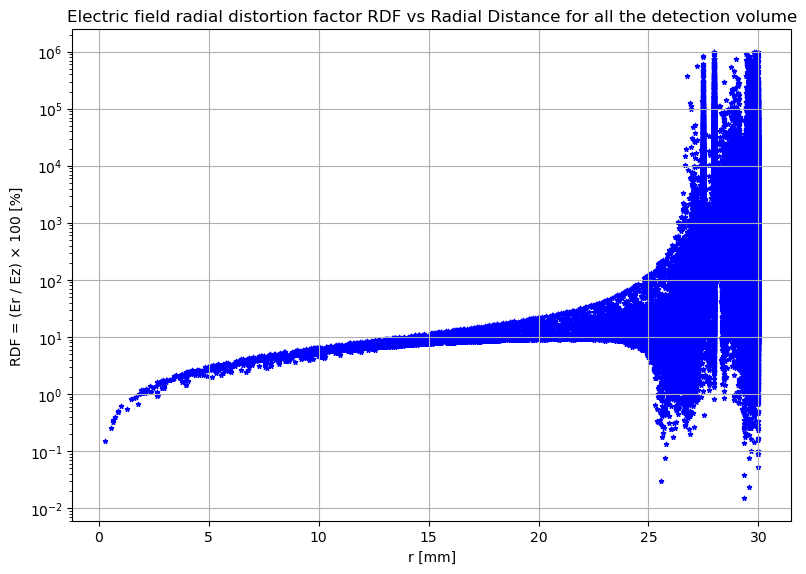

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/fullperfectfieldcagev7_norm_space.csv")

# Calculate Er
data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)

# Compute (Er/Ez) * 100
data["ratio"] = np.abs(data["Er"] / data["es.Ez (V/m)"]) * 100

# Filter for x > 0 and y > 0 and make a copy
filtered_data = data[(data["x"] > 0) & (data["y"] > 0)].copy()
print(filtered_data.head)

# Compute radial distance r = sqrt(x^2 + y^2)
filtered_data["r"] = np.sqrt(filtered_data["x"]**2 + filtered_data["y"]**2)
print(filtered_data.head)

# Choose a fixed z value
z_fixed = 25
tolerance = 20  # or any value depending on your data resolution

# Select rows where z is close to z_fixed
slice_data = filtered_data[np.abs(filtered_data["z"] - z_fixed) < tolerance]
slice_data = slice_data[slice_data["r"] < 30]
print(f"Min r: {slice_data['r'].min()}")  # Should be >= 0
# Filter data for r between 10 and 15 mm
r_min, r_max = 10, 20
subset = slice_data[(slice_data["r"] >= r_min) & (slice_data["r"] <= r_max)]

# Compute the average ratio
average_ratio = subset["ratio"].mean()

slice_data = slice_data[slice_data["r"] < 30]
slice_data = slice_data[(slice_data["ratio"] < 1000000) & (slice_data["ratio"] >= 1e-10) ]

# Print the result
print(f"Average RDF between r = {r_min} mm and r = {r_max} mm: {average_ratio:.2f} %")
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(slice_data["r"], slice_data["ratio"], color='blue', s=10, marker = '*')
plt.xlabel("r [mm]")
plt.ylabel("RDF = (Er / Ez) × 100 [%]")

plt.title(f"Electric field radial distortion factor RDF vs Radial Distance for all the detection volume")
plt.grid(True)
plt.tight_layout()
plt.yscale("log")
plt.savefig("21innerstripsEperfectz20.png")
plt.show()

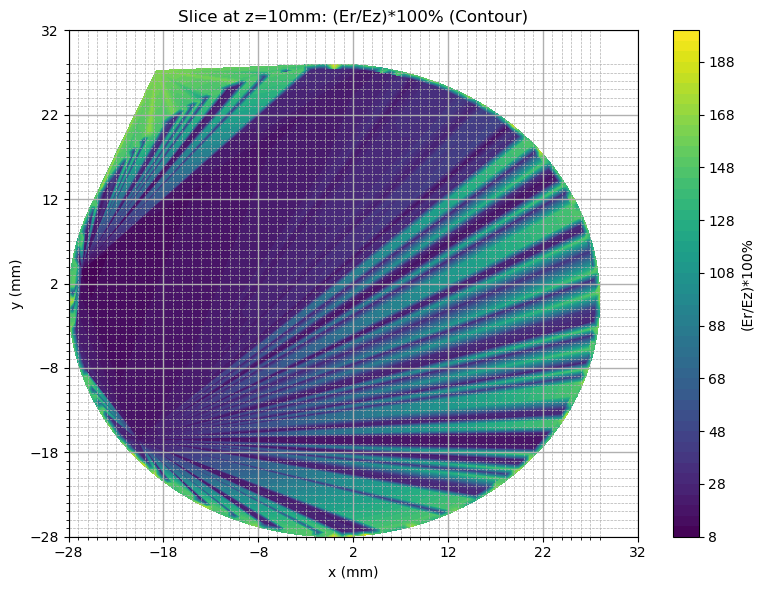

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/E.csv")

# Calculate Er
data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)

# Compute (Er/Ez) * 100
data["ratio"] = np.abs(data["Er"] / data["es.Ez (V/m)"]) * 100

# Filter for x > 0 and y > 0 and make a copy
filtered_data = data[(data["x"] > 0) & (data["y"] > 0)].copy()


# Compute radial distance r = sqrt(x^2 + y^2)
filtered_data["r"] = np.sqrt(filtered_data["x"]**2 + filtered_data["y"]**2)

# Choose a fixed z value
z_fixed = 20
tolerance = 0.3  # or any value depending on your data resolution

# Select rows where z is close to z_fixed
slice_data = filtered_data[np.abs(filtered_data["z"] - z_fixed) < tolerance]
slice_data = slice_data[slice_data["r"] < 30]
print(f"Min r: {slice_data['r'].min()}")  # Should be >= 0
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(slice_data["r"], slice_data["ratio"], color='blue', s=10)
plt.xlabel("r [mm]")
plt.ylabel("(Er / Ez) × 100 [%]")
plt.title(f"Electric field radial distortion factor vs Radial Distance for the slice z = {z_fixed}")
plt.grid(True)
plt.show()

## NO field Cage - FREE field

Min r: 0.2752561054423498
Average RDF between r = 10 mm and r = 20 mm: 32.14 %


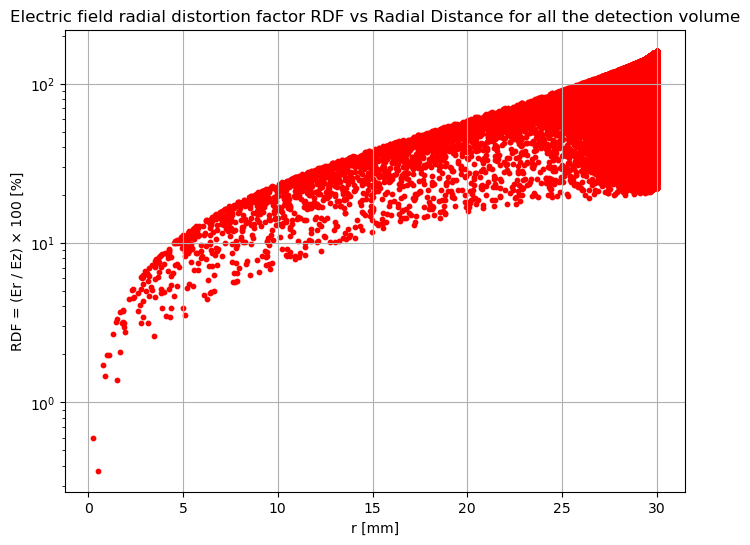

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from matplotlib.colors import LogNorm

data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/NOfieldcagev7_norm_space.csv")

# Calculate Er
data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)

# Compute (Er/Ez) * 100
data["ratio"] = np.abs(data["Er"] / data["es.Ez (V/m)"]) * 100

# Filter for x > 0 and y > 0 and make a copy
filtered_data = data[(data["x"] > 0) & (data["y"] > 0)].copy()


# Compute radial distance r = sqrt(x^2 + y^2)
filtered_data["r"] = np.sqrt(filtered_data["x"]**2 + filtered_data["y"]**2)

# Choose a fixed z value
z_fixed = 25
tolerance = 20  # or any value depending on your data resolution

# Select rows where z is close to z_fixed
slice_data = filtered_data[np.abs(filtered_data["z"] - z_fixed) < tolerance]
slice_data = slice_data[slice_data["r"] < 30]
print(f"Min r: {slice_data['r'].min()}")  # Should be >= 0
# Filter data for r between 10 and 20 mm
r_min, r_max = 10, 20
subset = slice_data[(slice_data["r"] >= r_min) & (slice_data["r"] <= r_max)]

# Compute the average ratio
average_ratio = subset["ratio"].mean()
slice_data = slice_data[(slice_data["ratio"] < 1000000) & (slice_data["ratio"] >= 1e-10) ]
# Print the result
print(f"Average RDF between r = {r_min} mm and r = {r_max} mm: {average_ratio:.2f} %")
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(slice_data["r"], slice_data["ratio"], color='red', s=10)
plt.xlabel("r [mm]")
plt.ylabel("RDF = (Er / Ez) × 100 [%]")
plt.title(f"Electric field radial distortion factor RDF vs Radial Distance for all the detection volume")
plt.grid(True)
plt.yscale("log")
plt.savefig("2nofieldcage6.png")
plt.show()


In [ ]:
36 strips

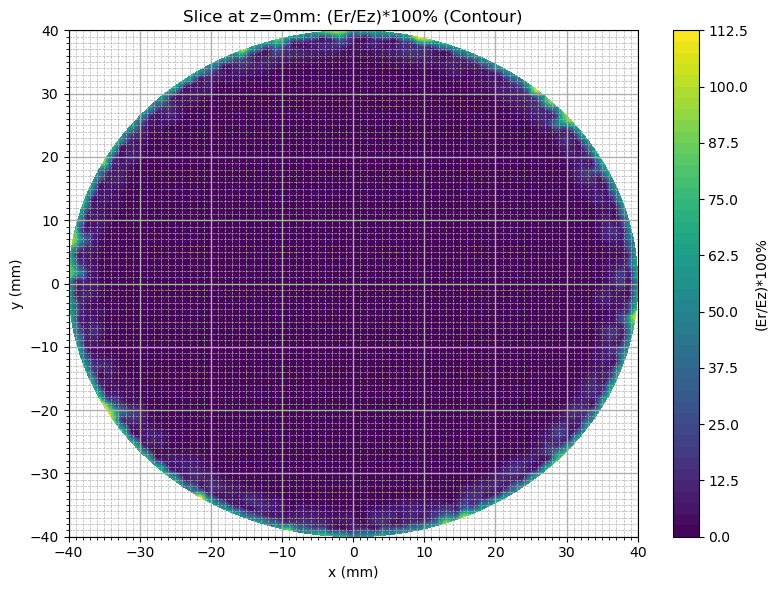

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/V2fieldcage.csv", skiprows=8)

# Compute Er
data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)

# Compute (Er/Ez)*100 and handle if Ez=0 (for now assuming Ez != 0)
ratio = (np.abs(data["Er"] / data["es.Ez (V/m)"])) * 100

# Filter data for z = 2 slice
slice_data = data[data["z"] == 0]

# Extract x, y, and ratio for this slice
x_slice = slice_data["x"]
y_slice = slice_data["y"]
ratio_slice = ratio.loc[slice_data.index]

# Create a 2D contour plot using tricontourf
fig, ax = plt.subplots(figsize=(8, 6))

# Choose a number of contour levels
levels = 50  # Increase or decrease for more/less detail

# Create a filled contour plot
contour = ax.tricontourf(x_slice, y_slice, ratio_slice, levels=levels, cmap='viridis')

# Add labels and title
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('Slice at z=0mm: (Er/Ez)*100% (Contour)')
# Determine range of data for setting tick marks
x_min, x_max = x_slice.min(), x_slice.max()
y_min, y_max = y_slice.min(), y_slice.max()

# Major ticks every 10 mm
x_major_ticks = np.arange(np.floor(x_min), np.ceil(x_max)+10, 10)
y_major_ticks = np.arange(np.floor(y_min), np.ceil(y_max)+10, 10)

ax.set_xticks(x_major_ticks)
ax.set_yticks(y_major_ticks)

# Minor ticks every 1 mm
x_minor_ticks = np.arange(np.floor(x_min), np.ceil(x_max)+1, 1)
y_minor_ticks = np.arange(np.floor(y_min), np.ceil(y_max)+1, 1)

ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_minor_ticks, minor=True)

# Enable grid for both major and minor ticks
# Major grid lines might be solid, minor grid lines might be dashed for clarity
ax.grid(which='major', linestyle='-', linewidth=1)
ax.grid(which='minor', linestyle='--', linewidth=0.5)
# Add colorbar
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('(Er/Ez)*100%')

plt.tight_layout()

plt.savefig("V2EProfilemyfieldcagexyplane0.png")
plt.show()

ValueError: arange: cannot compute length

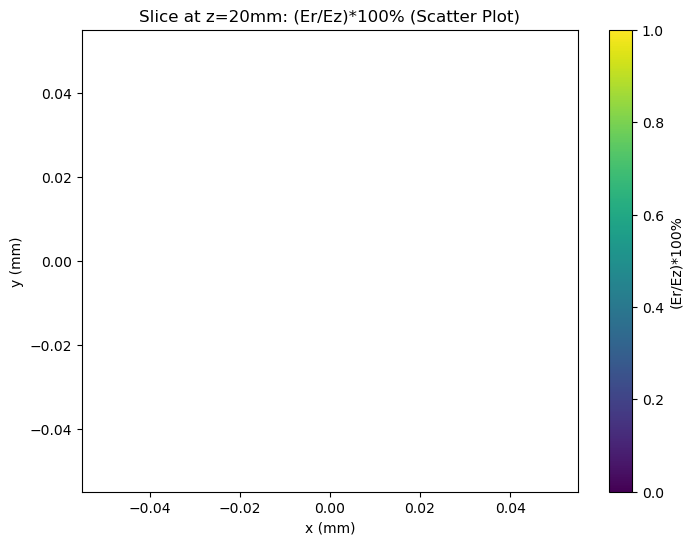

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lire les données
data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/V3fieldcage.csv", skiprows=8)

# Calculer Er
data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)

# Calculer le ratio (Er/Ez)*100 et éviter la division par zéro
data["ratio"] = np.where(data["es.Ez (V/m)"] != 0, (np.abs(data["Er"] / data["es.Ez (V/m)"])) * 100, np.nan)

# Filtrer les données pour z = 9
slice_data = data[data["z"] == 20]

# Extraire x, y et ratio pour cette tranche
x_slice = slice_data["x"]
y_slice = slice_data["y"]
ratio_slice = slice_data["ratio"]

# Créer un graphique en nuage de points avec une échelle de couleur
fig, ax = plt.subplots(figsize=(8, 6))

# Créer le scatter plot
scatter = ax.scatter(x_slice, y_slice, c=ratio_slice, cmap='viridis', s=20, edgecolor='k')

# Ajouter des étiquettes et un titre
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_title('Slice at z=20mm: (Er/Ez)*100% (Scatter Plot)')

# Ajouter une barre de couleur
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('(Er/Ez)*100%')

# Définir les ticks majeurs et mineurs
x_min, x_max = x_slice.min(), x_slice.max()
y_min, y_max = y_slice.min(), y_slice.max()

x_major_ticks = np.arange(np.floor(x_min), np.ceil(x_max)+10, 10)
y_major_ticks = np.arange(np.floor(y_min), np.ceil(y_max)+10, 10)

x_minor_ticks = np.arange(np.floor(x_min), np.ceil(x_max)+1, 1)
y_minor_ticks = np.arange(np.floor(y_min), np.ceil(y_max)+1, 1)

ax.set_xticks(x_major_ticks)
ax.set_yticks(y_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)
ax.set_yticks(y_minor_ticks, minor=True)

# Grilles pour les ticks majeurs et mineurs
ax.grid(which='major', linestyle='-', linewidth=1)
ax.grid(which='minor', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig("V3EProfilemyfieldcagexyplane9_scatter.png")
plt.show()

Average RDF between r = 10 mm and r = 20 mm: 4.28 %
Min r: 0.5639628826438846


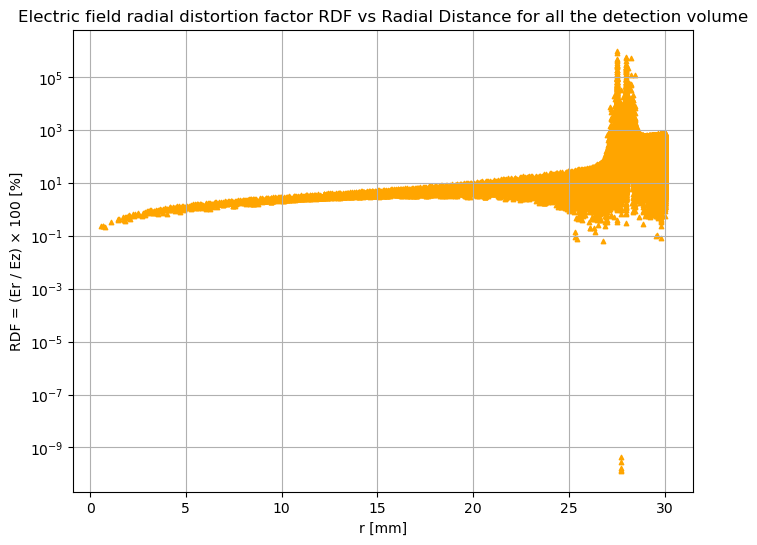

In [2]:
##Inner strips only

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from matplotlib.colors import LogNorm

#data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/inneronlyfieldcagev7_norm_space.csv")
data = pd.read_csv("/Users/mehdi/workspace/COMSOL/icetea_v0/21inneronlyfieldcagev8_norm_space.csv")
# Calculate Er
data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)

# Compute (Er/Ez) * 100
data["ratio"] = np.abs(data["Er"] / data["es.Ez (V/m)"]) * 100

# Filter for x > 0 and y > 0 and make a copy
filtered_data = data[(data["x"] > 0) & (data["y"] > 0)].copy()


# Compute radial distance r = sqrt(x^2 + y^2)
filtered_data["r"] = np.sqrt(filtered_data["x"]**2 + filtered_data["y"]**2)

# Choose a fixed z value
z_fixed = 25
tolerance = 20  # or any value depending on your data resolution

# Select rows where z is close to z_fixed
slice_data = filtered_data[np.abs(filtered_data["z"] - z_fixed) < tolerance]
slice_data = slice_data[slice_data["r"] < 30]
# Filter data for r between 10 and 15 mm
r_min, r_max = 10, 20
subset = slice_data[(slice_data["r"] >= r_min) & (slice_data["r"] <= r_max)]

# Compute the average ratio
average_ratio = subset["ratio"].mean()
slice_data = slice_data[(slice_data["ratio"] < 1000000) & (slice_data["ratio"] >= 1e-10) ]
# Print the result
print(f"Average RDF between r = {r_min} mm and r = {r_max} mm: {average_ratio:.2f} %")
print(f"Min r: {slice_data['r'].min()}")  # Should be >= 0
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(slice_data["r"], slice_data["ratio"], color='orange', s=10, marker = '^')
plt.xlabel("r [mm]")
plt.ylabel("RDF = (Er / Ez) × 100 [%]")
plt.title(f"Electric field radial distortion factor RDF vs Radial Distance for all the detection volume")
plt.grid(True)
plt.yscale("log")
plt.savefig("21innerfieldcage8.png")
plt.show()


Average RDF between r = 10 mm and r = 20 mm: 4.28 %
Average RDF between r = 10 mm and r = 20 mm: 32.14 %
Average RDF between r = 10 mm and r = 20 mm: 4.28 %


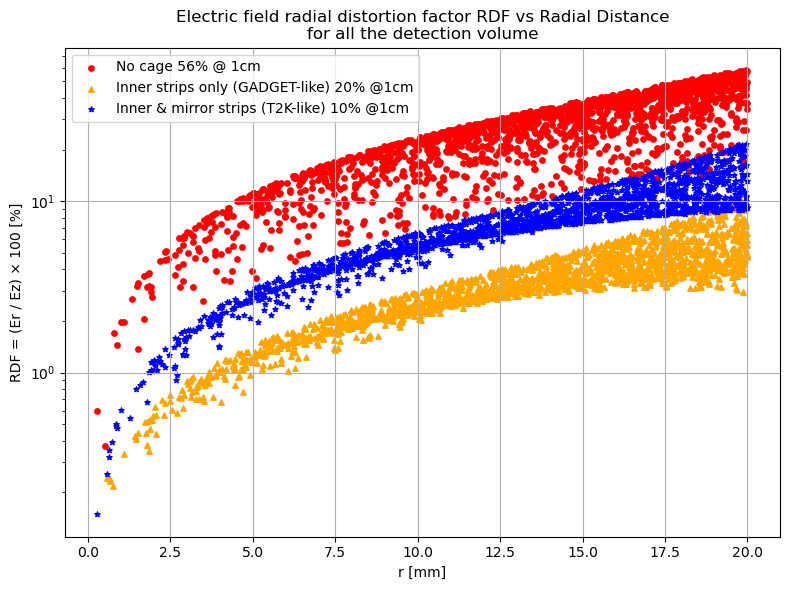

In [3]:
## all three of them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths
file_paths = ["/Users/mehdi/workspace/COMSOL/icetea_v0/NOfieldcagev7_norm_space.csv",
    #"/Users/mehdi/workspace/COMSOL/icetea_v0/inneronlyfieldcagev7_norm_space.csv",
    "/Users/mehdi/workspace/COMSOL/icetea_v0/21inneronlyfieldcagev8_norm_space.csv",
    "/Users/mehdi/workspace/COMSOL/icetea_v0/fullperfectfieldcagev7_norm_space.csv"
]

# Plot settings
colors = ['red', 'orange', 'blue']
markers = ['o', '^', '*']  # Circle, square, triangle
labels = ['No cage 56% @ 1cm','Inner strips only (GADGET-like) 20% @1cm',  'Inner & mirror strips (T2K-like) 10% @1cm']

# Plot setup
plt.figure(figsize=(8, 6))

# Loop over files
for path, color, marker, label in zip(file_paths, colors, markers, labels):
    # Read the data
    data = pd.read_csv(path)

    # Calculate Er and ratio
    data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)
    data["ratio"] = np.abs(data["Er"] / data["es.Ez (V/m)"]) * 100

    # Filter
    filtered_data = data[(data["x"] > 0) & (data["y"] > 0)].copy()
    filtered_data["r"] = np.sqrt(filtered_data["x"]**2 + filtered_data["y"]**2)

    # Filter data for r between 10 and 15 mm
    r_min, r_max = 10, 20
    subset = slice_data[(slice_data["r"] >= r_min) & (slice_data["r"] <= r_max)]

    # Compute the average ratio
    average_ratio = subset["ratio"].mean()

    # Print the result
    print(f"Average RDF between r = {r_min} mm and r = {r_max} mm: {average_ratio:.2f} %")

    # Select z slice
    z_fixed = 25
    tolerance = 20
    slice_data = filtered_data[np.abs(filtered_data["z"] - z_fixed) < tolerance]
    slice_data = slice_data[slice_data["r"] < 20]
    slice_data = slice_data[slice_data["ratio"] < 1000000]
    # Plot
    plt.scatter(
        slice_data["r"],
        slice_data["ratio"],
        color=color,
        s=15,
        marker=marker,
        label=label
    )

# Labels and legend
plt.xlabel("r [mm]")
plt.ylabel("RDF = (Er / Ez) × 100 [%]")
plt.title("Electric field radial distortion factor RDF vs Radial Distance\nfor all the detection volume")
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig("Ecomparison_z25v2.png")
plt.show()

Average RDF between r = 10 mm and r = 11 mm: 24.83 %
Average Ez: 75330.25 V/m, Std Dev Ez: 3923.24 V/m
Average RDF between r = 10 mm and r = 11 mm: 5.51 %
Average Ez: 99230.31 V/m, Std Dev Ez: 1456.74 V/m
Average RDF between r = 10 mm and r = 11 mm: 5.54 %
Average Ez: 99064.75 V/m, Std Dev Ez: 988.04 V/m


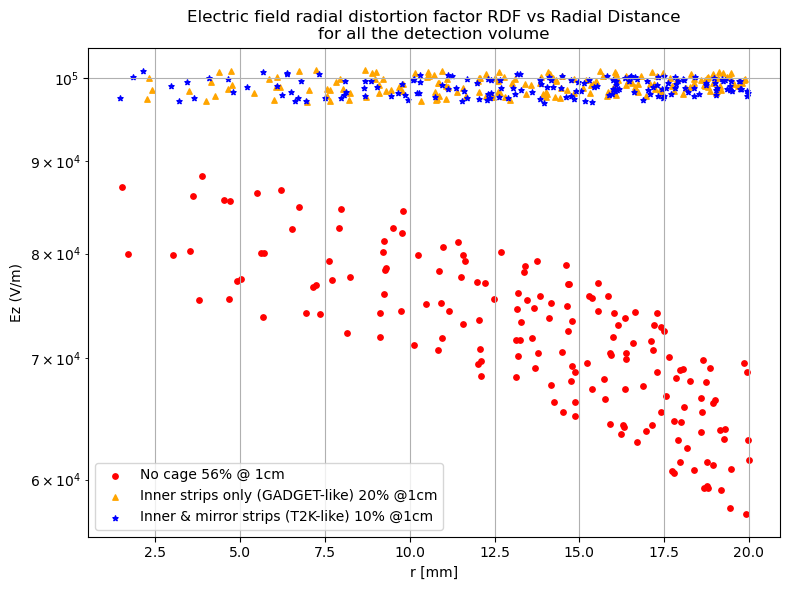

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths
file_paths = [
    "/Users/mehdi/workspace/COMSOL/icetea_v0/NOfieldcagev7_norm_space.csv",
    #"/Users/mehdi/workspace/COMSOL/icetea_v0/inneronlyfieldcagev7_norm_space.csv",
    "/Users/mehdi/workspace/COMSOL/icetea_v0/21inneronlyfieldcagev8_norm_space.csv",
    "/Users/mehdi/workspace/COMSOL/icetea_v0/fullperfectfieldcagev7_norm_space.csv"
]

# Plot settings
colors = ['red', 'orange', 'blue']
markers = ['o', '^', '*']  # Circle, square, triangle
labels = ['No cage 56% @ 1cm', 'Inner strips only (GADGET-like) 20% @1cm', 'Inner & mirror strips (T2K-like) 10% @1cm']

# Plot setup
plt.figure(figsize=(8, 6))

# Loop over files
for path, color, marker, label in zip(file_paths, colors, markers, labels):
    # Read the data
    data = pd.read_csv(path)

    # Calculate Er and ratio
    data["Er"] = np.sqrt(data["es.Ex (V/m)"]**2 + data["es.Ey (V/m)"]**2)
    data["ratio"] = np.abs(data["Er"] / data["es.Ez (V/m)"]) * 100
    data["Ez"] = np.abs(data["es.Ez (V/m)"])

    # Filter
    filtered_data = data[(data["x"] > 0) & (data["y"] > 0)].copy()
    filtered_data["r"] = np.sqrt(filtered_data["x"]**2 + filtered_data["y"]**2)

    # Select z slice
    z_fixed = 25
    tolerance = 2
    slice_data = filtered_data[np.abs(filtered_data["z"] - z_fixed) < tolerance]
    slice_data = slice_data[slice_data["r"] < 20]

    # Filter data for r between 10 and 15 mm
    r_min, r_max = 10, 11
    subset = slice_data[(slice_data["r"] >= r_min) & (slice_data["r"] <= r_max)]

    # Compute the average ratio
    average_ratio = subset["ratio"].mean()
    average_ez = subset["Ez"].mean()
    std_ez = subset["Ez"].std()

    # Print the result
    print(f"Average RDF between r = {r_min} mm and r = {r_max} mm: {average_ratio:.2f} %")
    print(f"Average Ez: {average_ez:.2f} V/m, Std Dev Ez: {std_ez:.2f} V/m")

    # Plot
    plt.scatter(
        slice_data["r"],
        slice_data["Ez"],
        color=color,
        s=15,
        marker=marker,
        label=label
    )

# Labels and legend
plt.xlabel("r [mm]")
plt.ylabel("Ez (V/m)")
plt.title("Electric field radial distortion factor RDF vs Radial Distance\nfor all the detection volume")
plt.grid(True)
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.savefig("Ecomparison_z25v3.png")
plt.show()